# Model - Selecting all features

In [62]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor

In [47]:
# load dataset
clean_df = pd.read_csv('clean_df.csv')

# Linear regression 

<b>Iteration 1</b><br>
R2 score : 0.65

In [48]:
# linear regression with all features 
X = clean_df.drop(['median_house_value'], axis=1)
y = clean_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)

#coef and intercept results
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)
print('Score:',score)

Coef: [-2.53627885e+04 -2.47556570e+04  1.00611811e+03 -3.54394931e+00
  6.22943544e+01 -4.63247835e+01  9.87044896e+01  3.83749182e+04
 -4.43039027e+04 -8.25074413e+04  2.12759889e+05 -4.57507379e+04
 -4.01978071e+04]
Intercept: -2072783.0750346326
Score: 0.650130089271503


In [15]:
# linear regression with 3 features 
X = clean_df.drop(['median_house_value'], axis=1)
y = clean_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)

#coef and intercept results
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)
print("R2={}".format(score))

Coef: [-2.40717843e+04 -2.36726527e+04  1.16283401e+03 -4.91345657e+00
  4.81685649e+01 -3.32204573e+01  9.42820824e+01  3.81663326e+04
 -3.79095918e+04 -7.73263486e+04  1.86311565e+05 -4.07080384e+04
 -3.03675865e+04]
Intercept: -1971712.774880405
R2=0.644896691121152


# Dummy Regressor

<b>Iteration 2</b><br>
R2 score : 0.0

In [16]:
X = clean_df.drop(['median_house_value'], axis=1)
y = clean_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

# instantiate Dummy classifier
dummy_reg = DummyRegressor(strategy="mean")

# fit the modem
dummy_reg.fit(X_train, y_train)

# R2 
print("R2={}".format(dummy_reg.score(X_train, y_train)))

R2=0.0


# Random Forest

<b>Iteration 3</b><br>
R2 score : 0.75

In [51]:
X = clean_df.drop(['median_house_value'], axis=1)
y = clean_df['median_house_value']

# standardizing the features (scaling)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

rf = RandomForestRegressor(n_estimators=10, random_state=20)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

# R2 
print("R2={}".format(rf.score(X_test,y_test)))

# MAE
errors = abs(pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# MAPE
mape = 100 * (errors / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

R2=0.759447544943563
Mean Absolute Error: 38292.01
Mean Absolute Percentage Error : 21.37 %.


# Standardisation / Normalisation / PAC / Random Forest

<b>Iteration 4</b><br>
R2 score : 0.63

In [28]:
# load dataset
clean_df = pd.read_csv('clean_df.csv')

# define X & y
X = clean_df.drop(['median_house_value'], axis=1)
y = clean_df['median_house_value']

In [29]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 5) 
X_df = pca.fit_transform(scaled_df) 
X_df = pd.DataFrame(X_df) 
X_df.columns = ['P1','P2','P3','P4','P5'] 
  
X_df.head(5)

,P1,P2,P3,P4,P5
0,-0.133750,1.191063,-2.292902,-0.488145,-0.122741
1,-0.067442,-1.967205,0.181470,-0.713308,-2.000137
2,-1.429434,1.025240,-1.854934,-0.379824,0.451070
3,-1.346855,-1.650927,-0.109072,-0.628647,0.974136
4,-0.713884,1.622817,-1.280269,-0.480297,-0.750879


In [30]:
# Explained variance ratio after PCA
pca.explained_variance_ratio_

array([0.30184832, 0.1971835 , 0.12702227, 0.09672436, 0.08243352])

In [31]:
# I keep 80% of my dataset with PCA
pca.explained_variance_ratio_.cumsum()

array([0.30184832, 0.49903181, 0.62605408, 0.72277845, 0.80521197])

In [32]:
final_df = pd.concat([X_df, clean_df[['median_house_value']]], axis = 1)

In [33]:
final_df

,P1,P2,P3,P4,P5,median_house_value
0,-0.133750,1.191063,-2.292902,-0.488145,-0.122741,72000.0
1,-0.067442,-1.967205,0.181470,-0.713308,-2.000137,274100.0
2,-1.429434,1.025240,-1.854934,-0.379824,0.451070,58300.0
3,-1.346855,-1.650927,-0.109072,-0.628647,0.974136,200000.0
4,-0.713884,1.622817,-1.280269,-0.480297,-0.750879,117900.0
...,...,...,...,...,...,...
16507,-1.355587,2.234550,-1.385134,-0.646579,-0.600386,93800.0
16508,-1.173451,2.431406,2.242647,0.216594,1.496426,103100.0
16509,-0.384370,1.965730,-1.192283,-0.556355,-1.020626,192600.0
16510,1.187258,-1.314160,0.537180,-0.482848,1.368276,153500.0


In [34]:
# Random Forest after scaling, normalizing, PCA

X = final_df.drop(['median_house_value'], axis=1)
y = final_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

rf = RandomForestRegressor(n_estimators=10, random_state=20)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

# R2 
print("R2={}".format(rf.score(X_test,y_test)))

# MAE
errors = abs(pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# MAPE
mape = 100 * (errors / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

R2=0.6339352563964014
Mean Absolute Error: 48736.93
Mean Absolute Percentage Error : 27.03 %.


# Standard Scaler / PCA / Linear Regression

<b>Iteration 5</b><br>
R2 score : 0.53

In [53]:
# load dataset
clean_df = pd.read_csv('clean_df.csv')

# define X & y
X = clean_df.drop(['median_house_value'], axis=1)
y = clean_df['median_house_value']

In [54]:
# standardizing the features (scaling)
X_std = StandardScaler().fit_transform(X)

In [55]:
# PCA without number of components for see all the explained variance ratio
pca = PCA()
pca_without = pca.fit(X_std).transform(X_std)
pca.explained_variance_ratio_

array([3.01848316e-01, 1.97183499e-01, 1.27022270e-01, 9.67243644e-02,
       8.24335222e-02, 7.65799073e-02, 5.45723726e-02, 4.42986418e-02,
       1.13019287e-02, 4.50006068e-03, 2.03487952e-03, 1.50023837e-03,
       3.88104078e-33])

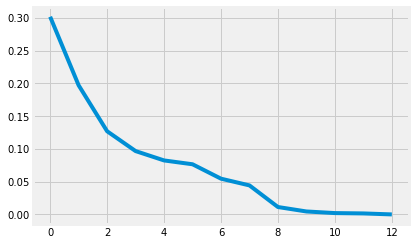

In [40]:
# plot explained variance
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [56]:
# PCA with 5 principal components
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)
pca_df = pd.DataFrame(data = principalComponents, 
                             columns = ['p1','p2','p3','p4','p5'])

In [57]:
# I keep 80% of my dataset with PCA
pca.explained_variance_ratio_.cumsum()

array([0.30184832, 0.49903181, 0.62605408, 0.72277845, 0.80521197])

In [58]:
# PCA with 5 principal components in dataframe
pca_df

,p1,p2,p3,p4,p5
0,-0.133750,1.191063,-2.292902,-0.488145,-0.122741
1,-0.067442,-1.967205,0.181470,-0.713308,-2.000137
2,-1.429434,1.025240,-1.854934,-0.379824,0.451070
3,-1.346855,-1.650927,-0.109072,-0.628647,0.974136
4,-0.713884,1.622817,-1.280269,-0.480297,-0.750879
...,...,...,...,...,...
16507,-1.355587,2.234550,-1.385134,-0.646579,-0.600386
16508,-1.173451,2.431406,2.242647,0.216594,1.496426
16509,-0.384370,1.965730,-1.192283,-0.556355,-1.020626
16510,1.187258,-1.314160,0.537180,-0.482848,1.368276


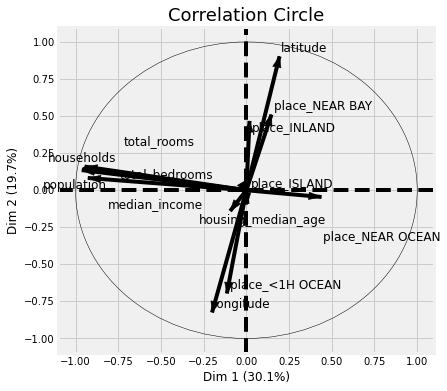

In [59]:
# correlation circle
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'place_<1H OCEAN', 'place_INLAND', 'place_ISLAND', 'place_NEAR BAY', 'place_NEAR OCEAN']
figure, correlation_matrix = plot_pca_correlation_graph(X_std,
                                                        features,
                                                        dimensions=(1,2),
                                                        figure_axis_size=6)

In [60]:
# concatenate pca_df with target
final_df = pd.concat([pca_df, clean_df[['median_house_value']]], axis = 1)

In [61]:
# linear regression
# define X & y
X = final_df.drop(['median_house_value'], axis=1)
y = final_df['median_house_value'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)

#coef and intercept results
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)
print("R2={}".format(score))

Coef: [  4414.18039591 -13563.63284995  51327.61348014  12436.79677657
 -46527.22917351]
Intercept: 207014.37915917428
R2=0.5633084777543509
